# Project Stage 1

**2.1: Group Members [Bhagyashree Aras and Supraja Amrutha]**

**2.2: Problem Formulation/Introduction**

**2.2.1: GIVEN PASSENGER IMFORMATION, WILL PASSENGER SURVIVE THE TITANIC SINKING?**
>We are given the passenger data of Titanic ship on it's first voyage on April 15, 1912, with their age, gender and socio-economic class etc. 
There were a total of 2224 passengers on board, out of which a subset of 1309 data set has been provided with a split of 891 X 12 train data 
set and 418 X 11 test data set. we have to build a machine learning model which can predict what sort of passengers are likely to survive the 
sinking of Titanic. The model will be trained on train data set and the predictions are made for test data set. According to our understanding
we consider this problem statement as a discovery problem as there is no prior evidence to prove that a particualr passenger will survive or not.

**2.2.2: According to the problem, what's the data population?**

DATA POPULATION: PASSENGER DATA

**(correction from stage 1 comments) The data population for this problem is the data of passengers that were on board on the day of titanic sinking**


**2.3: Data**

**2.3.1: Kaggle account username for our team: bhagyashreearas**

**2.3.2: Downloading the data, displaying several lines of data and description of what data is about**

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# IMPORTING THE STANDARD LIBRARIES
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import  accuracy_score
from sklearn.ensemble import  RandomForestClassifier
from sklearn import preprocessing 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import imblearn
#from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from IPython.display import Image

In [3]:
training_file='train.csv'
print(training_file, "======================")
with open(training_file, "r") as f:
    for i in range(10):
        print(i, "\t", repr(f.readline()))

train.csv ======================
0 	 'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n'
1 	 '1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n'
2 	 '2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n'
3 	 '3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n'
4 	 '4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\n'
5 	 '5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\n'
6 	 '6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\n'
7 	 '7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\n'
8 	 '8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\n'
9 	 '9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\n'


In [4]:
testing_file='test.csv'
print(testing_file, "======================")
with open(testing_file, "r") as f:
    for i in range(10):
        print(i, "\t", repr(f.readline()))

test.csv ======================
0 	 'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n'
1 	 '892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\n'
2 	 '893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\n'
3 	 '894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\n'
4 	 '895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\n'
5 	 '896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\n'
6 	 '897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\n'
7 	 '898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\n'
8 	 '899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\n'
9 	 '900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\n'


Description of train and test data:

>In the training data set there are 891 rows and 12 columns. Each row in the data set represents a passenger's information with unique passenger ID. the columns in the train data set are : 
* PassengerId: Unique ID to identify passenger, 
* Survived: whether that particular passenger survived or not,
* Pclass: is ticket class which also represents their socio-economic status
* Name: name of the passenger
* Sex: It determines the sex of the passenger whether male or female.
* Age: Represnets age of passenger and the data type is float. age can be less than 1.
* sibsp: This includes total of siblings and spouse of the passenger (mistresses and fiancés were ignored)
* parch: This includes number of parents or children they are travelling with, if children travelling with nanny then this number will be 0
* Ticket: Ticket number of the passenger
* Fare: fare of their ticket purchased
* Cabin: cabin number alloted to the passenger
* Embarked: it is the Port of Embarkation including C = Cherbourg, Q = Queenstown, S = Southampton

In test data, each and every column of train data is present except for survided column which we need to predict


**2.3.3: Data Wrangling:**

In [5]:
# importing the data and transforming the data into a data frame or data frames for analysis or visualization

train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**STRUCTURE**

In [7]:
#Checking for the shape of train data whether it is rectangle
train_data.shape

(891, 12)

In [8]:
#Checking for the shape of test data whether it is rectangle
test_data.shape

(418, 11)

In [9]:
#Checking for the data types of the each column in train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#Checking for the data types of the each column in test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
#understanding the train data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#Understanding data
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
# Checking how many survived
train_data.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0, 0.5, 'Density')

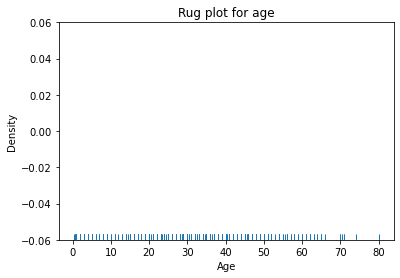

In [14]:
sns.rugplot(data = train_data, x="Age")
plt.title('Rug plot for age')
plt.ylabel('Density')

>Structure of the data is rectangular after converting it into the data frame. We can see the shape of the data also as shown above as it contains 891 rows and 12 columns. The info() function also gives us information about the train data types and number of rows with non-null vallues etc. As we can see above, data types for the columns are what we expect.

>For example, Passenger ID is int type and age is taken as float because there are infants and children in the data who might be less than an 1 year old. We also checked for ouliers in age column but we did not find many ouliers which should be avoided. Similarly for ticket column, it is an object because the ticket can consist of string and value combined. 


**GRANULARITY**

In [15]:
#Checking unique number of passenger id for train dataset
train_data.groupby('PassengerId').nunique()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,0,1
2,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,0,1
4,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,1,1,1,1,1,1,1,1,1,0,1
888,1,1,1,1,1,1,1,1,1,1,1
889,1,1,1,1,0,1,1,1,1,0,1


In [16]:
#Checking unique number of passenger id for test dataset

test_data.groupby('PassengerId').nunique()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,1,1,1,1,1,1,1,1,0,1
893,1,1,1,1,1,1,1,1,0,1
894,1,1,1,1,1,1,1,1,0,1
895,1,1,1,1,1,1,1,1,0,1
896,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1305,1,1,1,0,1,1,1,1,0,1
1306,1,1,1,1,1,1,1,1,1,1
1307,1,1,1,1,1,1,1,1,0,1


>Granularity: In the train and test data sets, each row represents information of exactly one individual person which is what we require. The property of granularity can be see above from the nunique fucntion which gives all the unique values which are equal to the number of rows in both data sets which proves that each row represents that the information is for
one unique individual. Hence the property of granularity is maintained in data.

**SCOPE**

Text(0.5, 1.0, 'Relationship between Passenger class and Number of passengers survived')

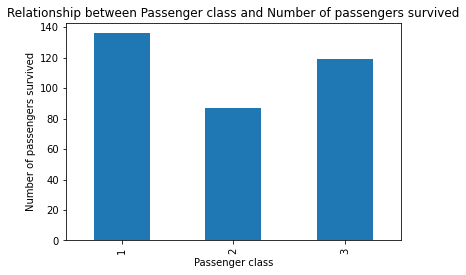

In [17]:
#Finding relationship between passenger class and number of passengers survived.
pclass_survived = train_data[(train_data["Survived"] == 1)]
pclass_survived = pclass_survived.groupby('Pclass').count()
pclass_survived = pclass_survived.iloc[:, 1]
pclass_survived.plot(kind="bar")
plt.ylabel('Number of passengers survived')
plt.xlabel('Passenger class')
plt.title('Relationship between Passenger class and Number of passengers survived')

In [18]:
#Checking passengers in each class
train_data.groupby('Pclass')['PassengerId'].nunique()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [19]:
#Checking percentage of passengers survived from each class
pclass_gender_survived = train_data[(train_data["Survived"] == 1)]
pclass_gender_survived = pclass_gender_survived.groupby(['Pclass']).count()
pclass_gender_survived = pclass_gender_survived.iloc[:, 1]
pclass_gender_survived = pclass_gender_survived.to_frame(name = 'total_survived').reset_index()
pclass_total =  train_data.groupby(['Pclass']).nunique()
pclass_total = pclass_total.iloc[:,0]
pclass_total = pclass_total.to_frame(name = 'total_passengers' ).reset_index()
pclass_gender_survived = pd.merge(pclass_total, pclass_gender_survived, how='left', on='Pclass' )
pclass_gender_survived['percent_survived'] = (pclass_gender_survived['total_survived'] / pclass_gender_survived['total_passengers'] ) * 100
pclass_gender_survived

,Pclass,total_passengers,total_survived,percent_survived
0,1,216,136,62.962963
1,2,184,87,47.282609
2,3,491,119,24.236253


>Scope: Scope of the model is limited for only titanic passengers who are on board as the data contains socio economic class which is unique to titanic ship and we assume that pclass can 
vary for other commute. As you can see from above summary maximum  people survived from pclass 1 
followed by class 2 and class 3   

**TEMPORALITY**

>Temporality: 
As it is shown above, there is no specific column containing the time stamp of occurence of this event 
because according to information on kaggle, this event occured at the same time for all passengers on the ship on April 15, 1912

**FAITHFULLNESS**

In [20]:
#Finding the correlation to see the postive correlation among the features
correlation = train_data.corr()
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [21]:
# Checking for null values in train data
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# Checking for null values in test data
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

>Faithfulness: As it is shown above, except for Age and Cabin columns there are no  other columns with major missing values. Age can be 
fixed by inserting mean age value in the null values as age is an  important feature to consider. But cabin has almost 75% missing values and we assume that this column is not of much use and it is better if we simply drop it instead of trying to 
tranform the cabin column. In test data one value for Fare column is missing which can be filled by dummy value
refering to the class of the passenger.

**2.3.4: Is data representative and assumptions**
>The data is representative for the sample given but if we are considering the whole data then the model
>will work under the following assumptions to make it represntative assumptions are: 

* As seen in the below graph line 27, the percentage of survival of infants and children is more (about 50%) 
when compared to other age groups. So the assumption is that age might be an important factor in the survival
of passengers.
* As calculated above in line 18, the percentage of survival of passengers from 1st class is higher than 
other two classes. So, one more assumption is that the survival might also be dependent on Pclass
* Also from the observations in lines 11 and 12, out of total survived, the survival of female passengers 
is almost 68% when compared to male passengers. So we are assuming that the survival rate depends on the 
gender of the passenger
* From the correlation table in line 19, it is shown that there is a postive correlation between sibsp and parch 
numbers which leads to the assumption that if a passenger is boarded along with parents/siblings there might be
more chance of survival of such passenger.




Text(0, 0.5, 'num of survvied passengers')

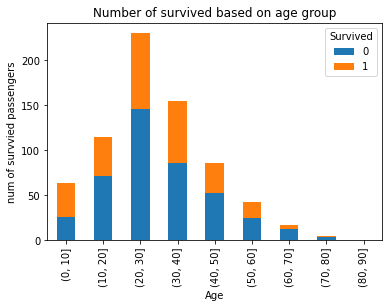

In [23]:
#Checking number of survived based on age group
train_data.groupby(['Survived', pd.cut(train_data['Age'], np.arange(0,100,10))]).size().unstack(0).plot.bar(stacked=True)
plt.title("Number of survived based on age group")
plt.ylabel('num of survvied passengers')

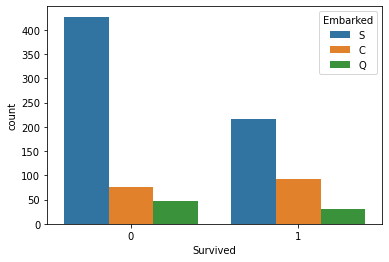

In [24]:
#Checking the relationship between embarked and survival
sns.countplot( x='Survived', data=train_data, hue="Embarked");

**2.3.5: Sampling Method**

In [25]:
#Checking number of passengers based on gender in train data
train_data.groupby('Sex')['PassengerId'].nunique()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [26]:
#Checking number of passengers based on gender in test data
test_data.groupby('Sex')['PassengerId'].nunique()

Sex
female    152
male      266
Name: PassengerId, dtype: int64

In [27]:
#Checking number of passengers based on pclass in train data
train_data.groupby(['Pclass'])['PassengerId'].nunique()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [28]:
#Checking number of passengers based on pclass in test data
test_data.groupby(['Pclass'])['PassengerId'].nunique()

Pclass
1    107
2     93
3    218
Name: PassengerId, dtype: int64

> Looking at the above results which show the total number of female and male passengers as well as 
 total number of passengers in each class, the kind of sampling that is used during the data collection
 seems to be stratified sampling. This is because the ratio of the female to male passengers in the train
 data is same as it is in the test data. Similarly, the ration of passengers in different classes is same
 in train as well as test data. Hence we strongly believe that stratified sampling is used while collecting
 data.

# PROJECT STAGE 2

**1.2 EDA and Data Transformation**

1.2.1. Describe the transformations of the data you have applied if applicable. Why or Why not?

* In the given train and test data set, except for age and cabin columns no other column is having large number of null values. Hence except for these two columns, normalization is not required for remaining columns. All the columns are in expected data types.

* Age: Age column has few number of rows with null values. From the above bar plot, we can see that there is a relationship between age and the survival of the passengers. Hence we need to normalize the age data and remove null values. As there are not many ouliers for age column, we make make use of mean age value to replace the null values.

* Cabin: Cabin column also contains many null values, but cabin is a string object which contains the cabin that was alloted for the passengers. As there are large number of values missing and there is no possibility of normalizing the data it would be reasonable if we just drop the cabin column.

* Fare: Null values has been replaced with mean value for fare column.

* Embarked: Null values have been replaced by the maximum value.

In [29]:
age_mean = train_data['Age'].mean();
train_data['Age'] = train_data['Age'].fillna(age_mean)
fare_mean = test_data['Fare'].mean();
test_data['Fare'] = test_data['Fare'].fillna(fare_mean)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
age_mean = test_data['Age'].mean();
test_data['Age'] = test_data['Age'].fillna(age_mean)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [31]:
train_data.drop('Cabin', axis=1, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [32]:
test_data.drop('Cabin', axis=1, inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [33]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
train_data['Embarked'] = train_data['Embarked'].fillna("S")


1.2.2. What are the features you choose to use for modeling? Why? Note: You may use EDA to show the reason.

* Age: As we have seen in above visualisations(line 23), age has an impact on passenger survival. We can see from bar graph that more number of children have survived when compared to other age groups. So, age is an important feature to consider.

* Pclass: We have also seen from the above statistics (line 19) that percentage of survival of first class passengers is more than other two classes and survival of second class passengers is more when compared to thrid class passengers. Hence pclass also has an affect on the outcome of survival which is an important feature to consider.

* Sex: Sex is also an important feature to consider because from statistics (line 13) it is evident that the survival of female passengers is more compared to male passengers.

* Sibsp and Parch: Sibsp and parch might also be some useful features to consider because we can see a positive correlation (line 20) between these two variables and the survived variable.

* Embarked: As we can see from above visualization (line 24) embarked also has some impact on the survival of passengers so it is an important feature to consider.

1.2.3. Readiness of data: Normalization has been done to make the data ready for modelling

**1.3 MODELING**

1.3.1 Describe the chosen model and why choose this one.

* Random Forest Classifier: It is a classifier that contains a number of decision trees that were created with the given dataset and takes the average to improve the accuracy of that dataset. Instead of relying on one decision tree, the random forest takes the maximum votes of predictions, and it predicts the final output.

* We are selecting Random Forest Classifier model because the problem we are trying to solve is a classification problem to predict whether a given passenger will survive the titanic sinking or not.

1.3.2. Describe how the chosen features in 1.2 are involved in the chosen model (e.g., weighted linear combination of features in a linear model).

* Random forest classifier will automatically assign weights to features based on their imporatance which it will calculate while creating the decision trees. In the random forest the importance of feature is found on the basis of averaging impurity decrease across all constructed trees to determine the final importance of a variable.

1.3.3. Describe the loss function that will be used to estimate the model's parameters (HINT: MSE? MAE? or others? if you are using an existing lib, you may need to check its document or google to figure out ).

* The loss function for Random Forest Classifier is 'Gini' or Entropy. In our model we are considering the default gini. Gini function will be used to measure the quality of a split.

1.3.4. Use a specific way (different ways have been discussed in A3) to estimate the model's parameters (e.g., sklearn's fit).

* To fit a Random Forest Classifier, an industry standard package is used which is available in sklearn for machine learning modeling. To do so, we first create a RandomForestClassifier object. Here, model is like a "blank slate" for a RandomForestClassifier model. Now, we need to tell model to "fit" itself to the data. We noticed that the data is unbalanced,to balance that we are performing over sampling.

In [35]:
#function to transform categorical data to numerical data
def convert(train_data):
    number = preprocessing.LabelEncoder()
    train_data['Sex'] = number.fit_transform(train_data.Sex)
    train_data['Embarked'] = number.fit_transform(train_data.Embarked)
    return train_data

In [36]:
#modeling part
modelB = RandomForestClassifier(random_state = 2)
mod = RandomUnderSampler(random_state=42, replacement=True)

train_data = convert(train_data)
test_data = convert(test_data)

x_train = train_data.drop(['PassengerId','Survived','Name','Ticket'], axis=1).values
y_train = train_data['Survived']
x_newTrain, y_newTrain = mod.fit_resample(x_train, y_train)
modelB.fit(x_newTrain,y_newTrain);
res = pd.read_csv("gender_submission.csv")
x_test = test_data.drop(['PassengerId','Name','Ticket'], axis=1).values
y_test = res.drop(['PassengerId'], axis=1).values
y_pred = modelB.predict(x_test)
submit_file = pd.read_csv('gender_submission.csv')
submit_file['Survived']=y_pred
submit_file.to_csv('submission.csv',index=False)

submit_file.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [37]:
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.8014354066985646

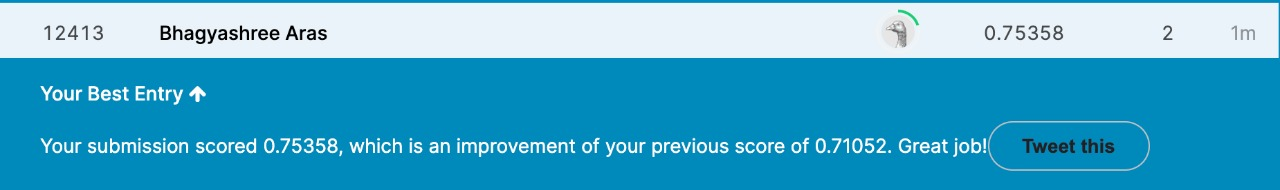

In [38]:
Image("accuracy1.jpeg")

**1.4 INFERENCE**

1.4.1. Correct choose of standard evaluation metric(s) for comparison, e.g., MSE for regression, accuracy for classification.

* As our model comes under the category of classification, the accuracy score is the correct evaluation metric used for comparison of models.

1.4.2. Sound data splitting for train and test using only the training data to fairly compare A and B (main idea can be borrowed from A3).

* Referring to A3, we are using stratified k-fold with number of splits = 5 only on the training data to compare model A and model B. Here, accuracies of all the 5 splits and mean accuracies from both models is returned.

1.4.3. Fair performance comparison between A and B with clear explanation on which is better and why (without loss of significance test, main idea can be borrowed from A3).

* As per the results it can be clearly seen that the mean accuracy of Random Forest classifier is much better than Logistic Regression. Comparing the mean accuracies, the accuracy of Random Forest Classifier is approximately 5% more than Logistic regression. This will be confirmed in the later stage using student t-test.

In [39]:
from sklearn.model_selection import StratifiedKFold

def compute_accuracy(modelA, modelB, X_train, Y_train):
    kf = StratifiedKFold(n_splits=5)
    validation_accuracies_A = []
    validation_accuracies_B = []
    for train_idx, valid_idx in kf.split(X_train,Y_train):
        # split the data
        split_X_train, split_X_valid = X_train[train_idx], X_train[valid_idx]
        split_Y_train, split_Y_valid = Y_train[train_idx], Y_train[valid_idx]

        # Fit the modelA on the training split
        modelA.fit(split_X_train,split_Y_train)
    
        
        # Compute the prediction accuracy on the validation split
        accuracyA = modelA.score(split_X_valid,split_Y_valid)

        validation_accuracies_A.append(accuracyA)

        # Fit the modelB on the training split
        modelB.fit(split_X_train,split_Y_train)

        
        # Compute the prediction accuracy on the validation split
        accuracyB = modelB.score(split_X_valid,split_Y_valid)

        validation_accuracies_B.append(accuracyB)

    return validation_accuracies_A, np.mean(validation_accuracies_A), validation_accuracies_B, np.mean(validation_accuracies_B)

In [40]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [41]:
modelA = LogisticRegression(solver='lbfgs', max_iter=100000)
modelB = RandomForestClassifier(random_state = 2)

mod = RandomUnderSampler(random_state=42, replacement = True)

train_data = convert(train_data)
test_data = convert(test_data)

x_train = train_data.drop(['PassengerId','Survived','Name','Ticket'], axis=1).values
y_train = train_data['Survived']
x_newTrain, y_newTrain = mod.fit_resample(x_train, y_train)

result = compute_accuracy(modelA, modelB, x_newTrain , y_newTrain)
result

([0.7518248175182481,
  0.7737226277372263,
  0.8029197080291971,
  0.7372262773722628,
  0.7794117647058824],
 0.7690210390725633,
 [0.8029197080291971,
  0.8029197080291971,
  0.8467153284671532,
  0.7737226277372263,
  0.8676470588235294],
 0.8187848862172608)

In [42]:
from scipy import stats

statistic,pvalue = stats.ttest_ind(result[0],result[2])
statistic,pvalue

(-2.4446608107733776, 0.040270682352035125)

In [43]:
# interpreting via p-value
significance_level = 0.05
if pvalue > significance_level:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


1.4.4. Conduct at least another submission to Kaggle and check if your leaderboard position can be improved (embed new screenshot for your leaderboard position in your notebook). 

In [44]:
##Improved model over first submission

modelB = RandomForestClassifier(max_depth = 2,random_state = 0)
mod = RandomUnderSampler(random_state=42, replacement=True)

train_data = convert(train_data)
test_data = convert(test_data)

x_train = train_data.drop(['PassengerId','Survived','Name','Ticket', 'Fare'], axis=1).values
y_train = train_data['Survived']
x_newTrain, y_newTrain = mod.fit_resample(x_train, y_train)
modelB.fit(x_newTrain,y_newTrain);
res = pd.read_csv("gender_submission.csv")
x_test = test_data.drop(['PassengerId','Name','Ticket', 'Fare'], axis=1).values
y_test = res.drop(['PassengerId'], axis=1).values
y_pred = modelB.predict(x_test)
submit_file = pd.read_csv('gender_submission.csv')
submit_file['Survived']=y_pred
submit_file.to_csv('submission.csv',index=False)

In [45]:
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.9832535885167464

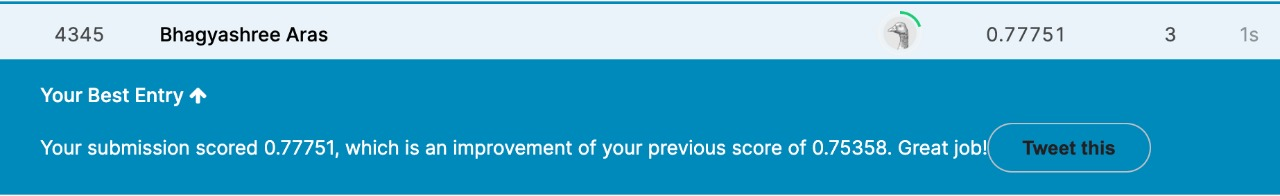

In [46]:
Image("accuracy2.jpeg")

**1.5 Conclusions and Learnings**

1.5.1. A convincing conclusion about the findings.

* The results statisctically provide convincing evidence that Logistic Regression and Random Forest Classifier perform differently. On average, the accuracy of Random Forest Classifier is approximately 5% more than Logistic regression. Thus the performance of Random Forest Classifier is better of the two models.

1.5.2. What you have learned from this project.

* We have learned how to implement an end to end data science project. This project helped us to understand every component of data science life cycle and it's significance. This project gave us the oppurtunity to get a hands on experience of what we learnt in theory. We also learnt the implementation of various machine learning models and how to the compare the performance of various models.

**1.6 Formats and Readability**

> Credits: A3 assignment for Inference part.